In [146]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [148]:
X,y = make_moons(n_samples=250, noise=0.05, random_state=42)

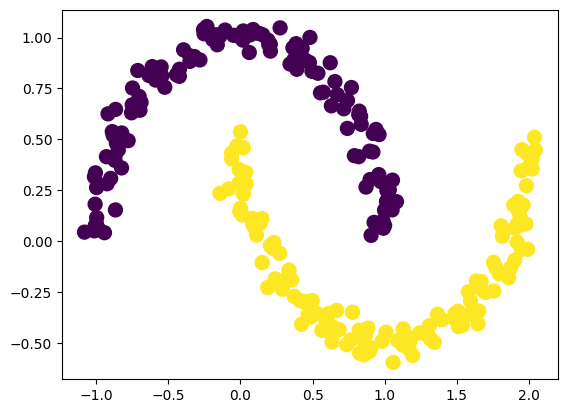

In [149]:
plt.scatter(X[:,0],X[:,1],c=y, s=100)
plt.show()

In [150]:
import torch
import torch.nn as nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [151]:

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Sigmoid(),
    nn.Linear(in_features=10, out_features=10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 1),
     nn.Sigmoid()
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): Sigmoid()
  (8): Linear(in_features=10, out_features=10, bias=True)
  (9): Sigmoid()
  (10): Linear(in_features=10, out_features=10, bias=True)
  (11): Sigmoid()
  (12): Linear(in_features=10, out_features=10, bias=True)
  (13): Sigmoid()
  (14): Linear(in_features=10, out_features=10, bias=True)
  (15): Sigmoid()
  (16): Linear(in_features=10, out_features=10, bias=True)
  (17): Sigmoid()
  (18): Linear(in_features=10, out_features=1, bias=True)
  (19): Sigmoid()
)

In [152]:

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_0.parameters(),lr=0.1)

In [153]:
X = torch.tensor(X, dtype=torch.float32).to(device)
y = torch.tensor(y, dtype=torch.float32).to(device)
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [154]:
epochs = 100
for i in range(epochs):
    model_0.train()
    output = torch.squeeze(model_0(X_train),dim=1)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{i+1}/100], Loss: {loss.item():.4f}')
    

Epoch [1/100], Loss: 0.7077
Epoch [2/100], Loss: 0.7242
Epoch [3/100], Loss: 0.7074
Epoch [4/100], Loss: 0.6932
Epoch [5/100], Loss: 0.6983
Epoch [6/100], Loss: 0.7037
Epoch [7/100], Loss: 0.6997
Epoch [8/100], Loss: 0.6942
Epoch [9/100], Loss: 0.6932
Epoch [10/100], Loss: 0.6955
Epoch [11/100], Loss: 0.6975
Epoch [12/100], Loss: 0.6975
Epoch [13/100], Loss: 0.6959
Epoch [14/100], Loss: 0.6940
Epoch [15/100], Loss: 0.6930
Epoch [16/100], Loss: 0.6933
Epoch [17/100], Loss: 0.6943
Epoch [18/100], Loss: 0.6950
Epoch [19/100], Loss: 0.6948
Epoch [20/100], Loss: 0.6940
Epoch [21/100], Loss: 0.6933
Epoch [22/100], Loss: 0.6930
Epoch [23/100], Loss: 0.6931
Epoch [24/100], Loss: 0.6935
Epoch [25/100], Loss: 0.6937
Epoch [26/100], Loss: 0.6938
Epoch [27/100], Loss: 0.6936
Epoch [28/100], Loss: 0.6933
Epoch [29/100], Loss: 0.6931
Epoch [30/100], Loss: 0.6929
Epoch [31/100], Loss: 0.6930
Epoch [32/100], Loss: 0.6932
Epoch [33/100], Loss: 0.6933
Epoch [34/100], Loss: 0.6933
Epoch [35/100], Loss: 0

In [155]:
# Vanishing Gradient occurred

In [156]:
# Solution 1: Reducing the nn complexity
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.Sigmoid(),
    nn.Linear(in_features=10, out_features=10),
     nn.Sigmoid(),
    nn.Linear(in_features = 10, out_features = 1),
     nn.Sigmoid(),
   
).to(device)

model_1

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)

In [157]:

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_1.parameters(),lr=0.1)

In [158]:
epochs = 100
for i in range(epochs):
    model_1.train()
    output = torch.squeeze(model_1(X_train),dim=1)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{i+1}/100], Loss: {loss.item():.4f}')
    

Epoch [1/100], Loss: 0.6945
Epoch [2/100], Loss: 0.7255
Epoch [3/100], Loss: 0.6816
Epoch [4/100], Loss: 0.6868
Epoch [5/100], Loss: 0.6825
Epoch [6/100], Loss: 0.6579
Epoch [7/100], Loss: 0.6283
Epoch [8/100], Loss: 0.5981
Epoch [9/100], Loss: 0.5638
Epoch [10/100], Loss: 0.5245
Epoch [11/100], Loss: 0.4848
Epoch [12/100], Loss: 0.4517
Epoch [13/100], Loss: 0.4290
Epoch [14/100], Loss: 0.4154
Epoch [15/100], Loss: 0.4064
Epoch [16/100], Loss: 0.3970
Epoch [17/100], Loss: 0.3852
Epoch [18/100], Loss: 0.3707
Epoch [19/100], Loss: 0.3542
Epoch [20/100], Loss: 0.3363
Epoch [21/100], Loss: 0.3188
Epoch [22/100], Loss: 0.3043
Epoch [23/100], Loss: 0.2948
Epoch [24/100], Loss: 0.2907
Epoch [25/100], Loss: 0.2933
Epoch [26/100], Loss: 0.3005
Epoch [27/100], Loss: 0.3060
Epoch [28/100], Loss: 0.3080
Epoch [29/100], Loss: 0.3083
Epoch [30/100], Loss: 0.3057
Epoch [31/100], Loss: 0.3001
Epoch [32/100], Loss: 0.2942
Epoch [33/100], Loss: 0.2895
Epoch [34/100], Loss: 0.2852
Epoch [35/100], Loss: 0

In [160]:
# Solution 2: Using Activation fuctions like ReLU()
model_2 = nn.Sequential(
    nn.Linear(in_features=2, out_features=10),
    nn.ReLU(),
    nn.Linear(in_features=10, out_features=10),
     nn.ReLU(),
    nn.Linear(in_features = 10, out_features = 1),
     nn.Sigmoid(),
   
).to(device)

model_2

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=1, bias=True)
  (5): Sigmoid()
)

In [161]:

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_2.parameters(),lr=0.1)

In [162]:
epochs = 100
for i in range(epochs):
    model_2.train()
    output = torch.squeeze(model_2(X_train),dim=1)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{i+1}/100], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 0.6900
Epoch [2/100], Loss: 0.6318
Epoch [3/100], Loss: 0.5432
Epoch [4/100], Loss: 0.4716
Epoch [5/100], Loss: 0.4119
Epoch [6/100], Loss: 0.3642
Epoch [7/100], Loss: 0.3301
Epoch [8/100], Loss: 0.2988
Epoch [9/100], Loss: 0.2818
Epoch [10/100], Loss: 0.2624
Epoch [11/100], Loss: 0.2540
Epoch [12/100], Loss: 0.2367
Epoch [13/100], Loss: 0.2141
Epoch [14/100], Loss: 0.1935
Epoch [15/100], Loss: 0.1620
Epoch [16/100], Loss: 0.1458
Epoch [17/100], Loss: 0.1238
Epoch [18/100], Loss: 0.1101
Epoch [19/100], Loss: 0.1025
Epoch [20/100], Loss: 0.0901
Epoch [21/100], Loss: 0.0831
Epoch [22/100], Loss: 0.0685
Epoch [23/100], Loss: 0.0594
Epoch [24/100], Loss: 0.0452
Epoch [25/100], Loss: 0.0337
Epoch [26/100], Loss: 0.0225
Epoch [27/100], Loss: 0.0166
Epoch [28/100], Loss: 0.0115
Epoch [29/100], Loss: 0.0081
Epoch [30/100], Loss: 0.0064
Epoch [31/100], Loss: 0.0049
Epoch [32/100], Loss: 0.0034
Epoch [33/100], Loss: 0.0024
Epoch [34/100], Loss: 0.0019
Epoch [35/100], Loss: 0